In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("sex_bmi_smokers.csv")

# Check the first few rows of the dataset to understand its structure
df.head()

,sex,bmi,smoker
0,female,27.900,yes
1,male,33.770,no
2,male,33.000,no
3,male,22.705,no
4,male,28.880,no


In [3]:
# Count the number of smoking men and non-smoking women
smoking_men = df[(df["sex"] == "male") & (df["smoker"] == "yes")].shape[0]
non_smoking_women = df[(df["sex"] == "female") & (df["smoker"] == "no")].shape[0]

print(f"Number of smoking men: {smoking_men}")
print(f"Number of non-smoking women: {non_smoking_women}")

Number of smoking men: 159
Number of non-smoking women: 547


In [4]:
# Calculate overall statistics
mean_bmi = df["bmi"].mean()
variance_bmi = df["bmi"].var()
median_bmi = df["bmi"].median()
quantile_bmi = df["bmi"].quantile(3/5)

print(f"Sample Mean BMI: {mean_bmi}")
print(f"Sample Variance of BMI: {variance_bmi}")
print(f"Sample Median BMI: {median_bmi}")
print(f"Sample Quantile (3/5) BMI: {quantile_bmi}")

Sample Mean BMI: 30.66339686098655
Sample Variance of BMI: 37.18788360977323
Sample Median BMI: 30.4
Sample Quantile (3/5) BMI: 32.032


In [5]:
# Group by sex and smoker columns and calculate statistics
grouped_stats = df.groupby(["sex", "smoker"])["bmi"].agg(['mean', 'var', 'median', lambda x: x.quantile(3/5)])
print("\nStatistics for each sex-smoking combination:")
print(grouped_stats)


Statistics for each sex-smoking combination:
                    mean        var  median  <lambda_0>
sex    smoker                                          
female no      30.539525  34.831015  30.210      31.912
       yes     29.608261  44.406251  28.380      30.876
male   no      30.770580  38.348801  30.495      32.110
       yes     31.504182  35.426638  31.130      33.244


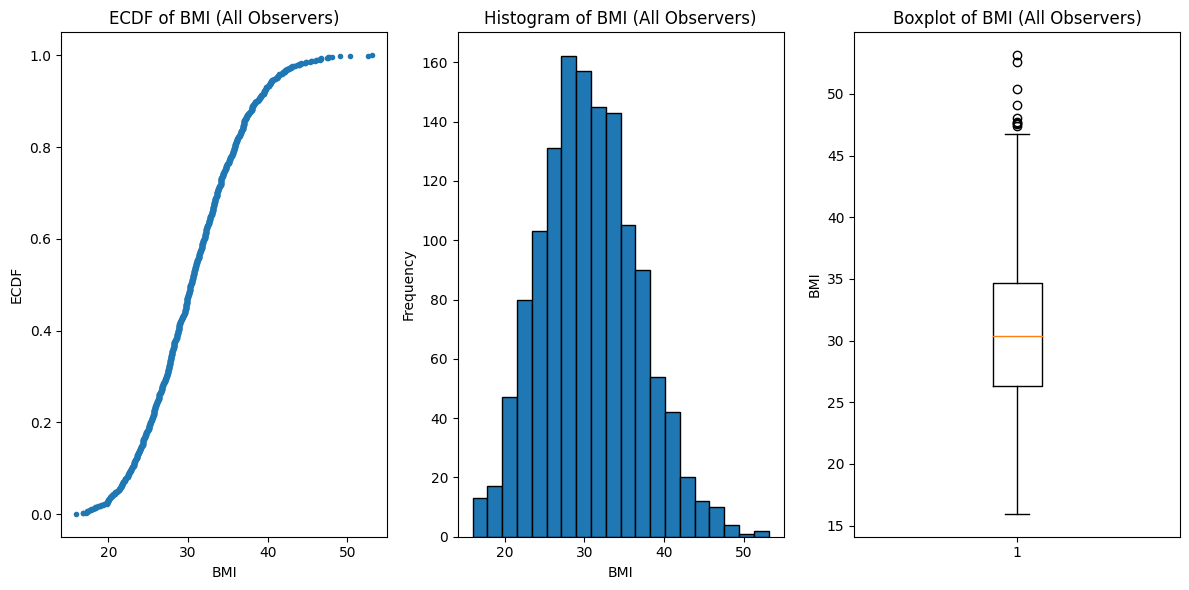

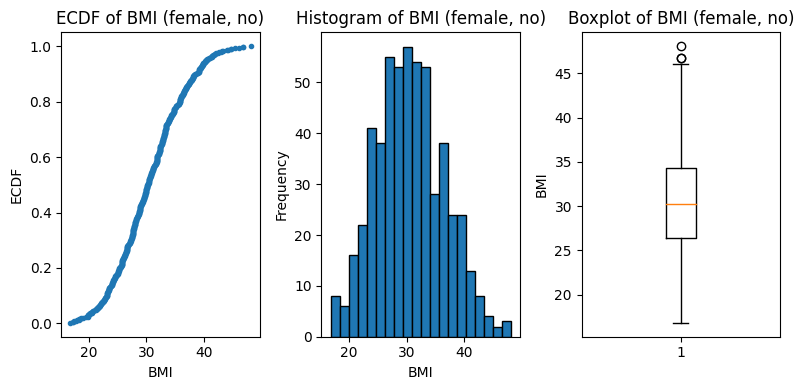

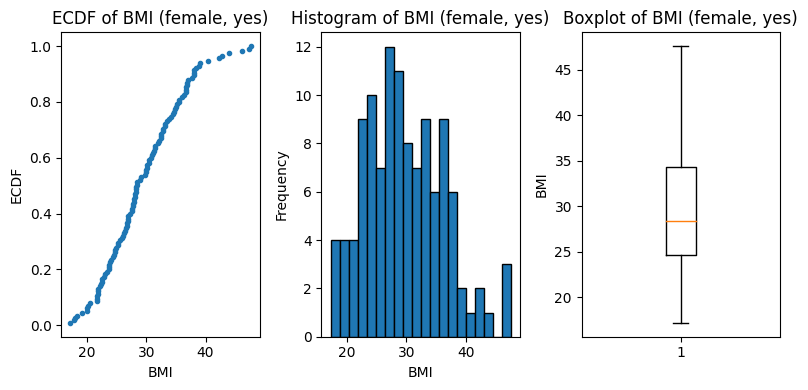

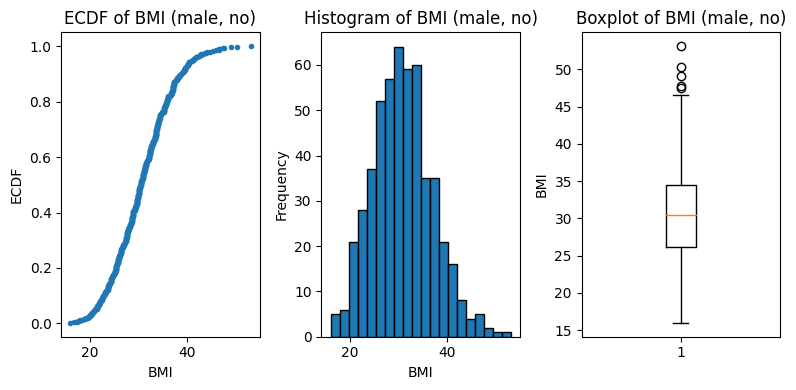

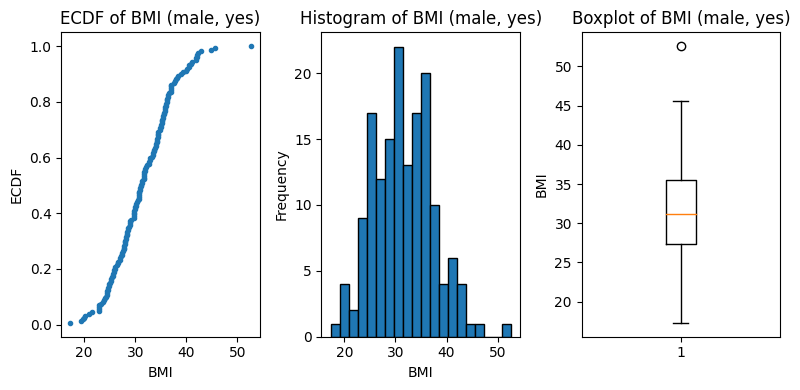

In [6]:
import matplotlib.pyplot as plt

# Empirical Distribution Function (ECDF)
def ecdf(data):
    n = len(data)
    x = sorted(data)
    y = [i / n for i in range(1, n + 1)]
    return x, y

# Plot ECDF, histogram, and boxplot
plt.figure(figsize=(12, 6))

# ECDF for all observers
x, y = ecdf(df["bmi"])
plt.subplot(131)
plt.plot(x, y, marker='.', linestyle='none')
plt.title("ECDF of BMI (All Observers)")
plt.xlabel("BMI")
plt.ylabel("ECDF")

# Histogram for all observers
plt.subplot(132)
plt.hist(df["bmi"], bins=20, edgecolor='k')
plt.title("Histogram of BMI (All Observers)")
plt.xlabel("BMI")
plt.ylabel("Frequency")

# Boxplot for all observers
plt.subplot(133)
plt.boxplot(df["bmi"])
plt.title("Boxplot of BMI (All Observers)")
plt.ylabel("BMI")

plt.tight_layout()

# Separate plots for each sex-smoking combination
for idx, group_name in enumerate(grouped_stats.index):
    sex, smoker = group_name
    subset = df[(df["sex"] == sex) & (df["smoker"] == smoker)]["bmi"]

    plt.figure(figsize=(8, 4))
    
    # ECDF
    x, y = ecdf(subset)
    plt.subplot(131)
    plt.plot(x, y, marker='.', linestyle='none')
    plt.title(f"ECDF of BMI ({sex}, {smoker})")
    plt.xlabel("BMI")
    plt.ylabel("ECDF")

    # Histogram
    plt.subplot(132)
    plt.hist(subset, bins=20, edgecolor='k')
    plt.title(f"Histogram of BMI ({sex}, {smoker})")
    plt.xlabel("BMI")
    plt.ylabel("Frequency")

    # Boxplot
    plt.subplot(133)
    plt.boxplot(subset)
    plt.title(f"Boxplot of BMI ({sex}, {smoker})")
    plt.ylabel("BMI")

    plt.tight_layout()

plt.show()